#**Aritra Ray**

#**21IM10008**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix

#**Random Forest Regression (Boston Housing Dataset)**

# Data preparation

In [2]:
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X_boston, y_boston = data, target
X_boston_train, X_boston_temp, y_boston_train, y_boston_temp = train_test_split(X_boston, y_boston, test_size=0.3, random_state=42)
X_boston_val, X_boston_test, y_boston_val, y_boston_test = train_test_split(X_boston_temp, y_boston_temp, test_size=0.5, random_state=42)

# Model training and hyperparameter tuning

In [3]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'max_features': [int(np.log2(X_boston.shape[1]))]
}
rf = RandomForestRegressor(criterion='squared_error')
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_boston_train, y_boston_train)
best_rf = grid_search_rf.best_estimator_

# Evaluation with trained model corresponding to best hyperparameters

Random Forest Regression Mean Squared Error: 15.74446744329306


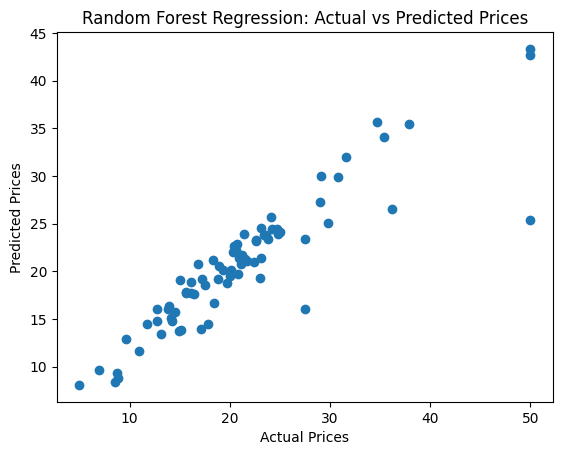

In [4]:
y_pred_rf = best_rf.predict(X_boston_test)
mse_rf = mean_squared_error(y_boston_test, y_pred_rf)
print("Random Forest Regression Mean Squared Error:", mse_rf)

plt.scatter(y_boston_test, y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest Regression: Actual vs Predicted Prices")
plt.show()

# **AdaBoost Classification (Breast Cancer Dataset)**

# Data preparation

In [5]:
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target
X_bc_train, X_bc_temp, y_bc_train, y_bc_temp = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)
X_bc_val, X_bc_test, y_bc_val, y_bc_test = train_test_split(X_bc_temp, y_bc_temp, test_size=0.5, random_state=42)

# Model training and hyperparameter tuning (custom implementation)

In [6]:
class CustomAdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.models = []

    def fit(self, X, y):
        n = X.shape[0]
        w = np.ones(n) / n  # Initialize weights
        for _ in range(self.n_estimators):
            model = DecisionTreeClassifier(max_depth=1)
            model.fit(X, y, sample_weight=w)
            y_pred = model.predict(X)
            err = np.sum(w * (y_pred != y)) / np.sum(w)  # Calculate weighted error
            alpha = 0.5 * np.log((1 - err) / err)  # Calculate model weight
            w *= np.exp(-alpha * y * y_pred)  # Update weights
            w /= np.sum(w)  # Normalize weights
            self.models.append((alpha, model))

    def predict(self, X):
        preds = np.zeros(X.shape[0])
        for alpha, model in self.models:
            preds += alpha * model.predict(X)
        return np.sign(preds)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

    def get_params(self, deep=True):
        return {'n_estimators': self.n_estimators}

    def set_params(self, **params):
        if 'n_estimators' in params:
            self.n_estimators = params['n_estimators']
        return self

param_grid_custom_adaboost = {'n_estimators': [50, 100, 150]}
grid_search_custom_adaboost = GridSearchCV(CustomAdaBoost(), param_grid_custom_adaboost, cv=5)
grid_search_custom_adaboost.fit(X_bc_train, y_bc_train)
best_custom_adaboost = grid_search_custom_adaboost.best_estimator_

# Evaluation with trained model corresponding to best hyperparameters (custom implementation)

In [7]:
y_pred_custom_adaboost = best_custom_adaboost.predict(X_bc_test)
print("Custom AdaBoost Classification Report:")
print(classification_report(y_bc_test, y_pred_custom_adaboost))
print("Confusion Matrix:")
print(confusion_matrix(y_bc_test, y_pred_custom_adaboost))

Custom AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.94      0.97      0.95        60

    accuracy                           0.93        86
   macro avg       0.93      0.91      0.92        86
weighted avg       0.93      0.93      0.93        86

Confusion Matrix:
[[22  4]
 [ 2 58]]


# Comparison with sklearn’s implementation of Adaboost Classifier

In [8]:
param_grid_sklearn_adaboost = {'n_estimators': [50, 100, 150]}
grid_search_sklearn_adaboost = GridSearchCV(AdaBoostClassifier(), param_grid_sklearn_adaboost, cv=5)
grid_search_sklearn_adaboost.fit(X_bc_train, y_bc_train)
best_sklearn_adaboost = grid_search_sklearn_adaboost.best_estimator_
y_pred_sklearn_adaboost = best_sklearn_adaboost.predict(X_bc_test) # Evaluation with trained model corresponding to best hyperparameters (sklearn implementation)
print("Sklearn AdaBoost Classification Report:")
print(classification_report(y_bc_test, y_pred_sklearn_adaboost))
print("Confusion Matrix:")
print(confusion_matrix(y_bc_test, y_pred_sklearn_adaboost))

c:\Users\aritr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aritr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aritr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aritr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

Sklearn AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.98      0.99        60

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86

Confusion Matrix:
[[26  0]
 [ 1 59]]
